# Bank Loan Analysis Project

## Import libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

In [8]:
df = pd.read_excel("/Users/winifredmei/Desktop/projects/Python Project - Finance Domain/financial_loan.xlsx")

## Metadata of data

In [11]:
print("No of Rows:", df.shape[0])

No of Rows: 38576


In [12]:
print("No of Columns:", df.shape[1])

No of Columns: 24


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     38576 non-null  int64         
 1   address_state          38576 non-null  object        
 2   application_type       38576 non-null  object        
 3   emp_length             38576 non-null  object        
 4   emp_title              37138 non-null  object        
 5   grade                  38576 non-null  object        
 6   home_ownership         38576 non-null  object        
 7   issue_date             38576 non-null  datetime64[ns]
 8   last_credit_pull_date  38576 non-null  datetime64[ns]
 9   last_payment_date      38576 non-null  datetime64[ns]
 10  loan_status            38576 non-null  object        
 11  next_payment_date      38576 non-null  datetime64[ns]
 12  member_id              38576 non-null  int64         
 13  p

## Data type

In [16]:
df.dtypes

id                                int64
address_state                    object
application_type                 object
emp_length                       object
emp_title                        object
grade                            object
home_ownership                   object
issue_date               datetime64[ns]
last_credit_pull_date    datetime64[ns]
last_payment_date        datetime64[ns]
loan_status                      object
next_payment_date        datetime64[ns]
member_id                         int64
purpose                          object
sub_grade                        object
term                             object
verification_status              object
annual_income                   float64
dti                             float64
installment                     float64
int_rate                        float64
loan_amount                       int64
total_acc                         int64
total_payment                     int64
dtype: object

In [17]:
df.describe()

,id,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.810371e+05,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
std,2.113246e+05,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777
min,5.473400e+04,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,5.135170e+05,6.629788e+05,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000
50%,6.627280e+05,8.473565e+05,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000
75%,8.365060e+05,1.045652e+06,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000
max,1.077501e+06,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000


## Key Performance Indicators

### Total Loan

In [18]:
total_loan_application = df['id'].count()
print("Total Loan Applications:", total_loan_application)

Total Loan Applications: 38576


### MTD Total Loan Applications

In [22]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df["issue_date"].dt.year == latest_year) & (df["issue_date"].dt.month == latest_month)]
mtd_loan_applications = mtd_data['id'].count()  

print(f"MTD Loan Applications (for {latest_issue_date.strftime('%B %Y')}) : {mtd_loan_applications}")


MTD Loan Applications (for December 2021) : 4314


###  Total Funded Amount

In [24]:
total_funded_amount = df['loan_amount'].sum()
total_funded_amount_millions = total_funded_amount / 1_000_000
print("Total Funded Amount: ${:.2f}M".format(total_funded_amount_millions))


Total Funded Amount: $435.76M


###  MTD - Total Funded Amount

In [26]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df["issue_date"].dt.year == latest_year) & (df["issue_date"].dt.month == latest_month)]

mtd_total_funded_amount = mtd_data['loan_amount'].sum()
mtd_total_funded_amount_millions = mtd_total_funded_amount/ 1000000

print("MTD Total Funded Amount: ${:.2f}M".format(mtd_total_funded_amount_millions))


MTD Total Funded Amount: $53.98M


###  Total  Amount Received

In [27]:
total_amount_received = df['total_payment'].sum()
total_amount_received_millions = total_amount_received / 1_000_000
print("Total Amount Received: ${:.2f}M".format(total_amount_received_millions))


Total Amount Received: $473.07M


###  Average Interest Rate

In [31]:
average_interest_rate = df['int_rate'].mean() * 100
print('Average Interest Rate:{:.2f}%'.format(average_interest_rate))

Average Interest Rate:12.05%


###  Average Debt-to-Income Ratio(DTI)

In [32]:
average_dti = df['dti'].mean() * 100
print('Average Debt-to-Income Ratio:{:.2f}%'.format(average_dti))

Average Debt-to-Income Ratio:13.33%


###  Good Loan Metrics

In [34]:
good_loans = df[df['loan_status'].isin(["Fully", "Current"])]

total_loan_applications = df['id'].count()

good_loan_applications = good_loans['id'].count()
good_loan_funded_amount = good_loans['loan_amount'].sum()
good_loan_received = good_loans['total_payment'].sum()

good_loan_funded_amount_millions = good_loan_funded_amount / 1_000_000
good_loan_received_millions = good_loan_received / 1_000_000

good_loan_percentage = (good_loan_applications / total_loan_applications) * 100

print("Good Loan Applications:", good_loan_applications)
print("Good Loan Funded Amount (in Millions): ${:.2f}M".format(good_loan_funded_amount_millions))
print("Good Loan Total Received (in Millions): ${:.2f}M".format(good_loan_received_millions))
print("Percentage of Good Loan Applications: {:.2f}%".format(good_loan_percentage))

Good Loan Applications: 33243
Good Loan Funded Amount (in Millions): $370.22M
Good Loan Total Received (in Millions): $435.79M
Percentage of Good Loan Applications: 86.18%


### Bad Loan Metrics

In [36]:
bad_loans = df[df['loan_status'].isin(["Charged Off"])] 

total_loan_applications = df['id'].count()

bad_loan_applications = bad_loans['id'].count()
bad_loan_funded_amount = bad_loans['loan_amount'].sum()
bad_loan_received = bad_loans['total_payment'].sum()

bad_loan_funded_amount_millions = bad_loan_funded_amount / 1000000
bad_loan_received_millions = bad_loan_received / 1000000

bad_loan_percentage = (bad_loan_applications / total_loan_applications) * 100

print("Bad Loan Applications:", good_loan_applications)
print("Bad Loan Funded Amount (in Millions): ${:.2f}M".format(bad_loan_funded_amount_millions))
print("Bad Loan Total Received (in Millions): ${:.2f}M".format(bad_loan_received_millions))
print("Percentage of Bad Loan Applications: {:.2f}%".format(bad_loan_percentage))


Bad Loan Applications: 33243
Bad Loan Funded Amount (in Millions): $65.53M
Bad Loan Total Received (in Millions): $37.28M
Percentage of Bad Loan Applications: 13.82%


###  Monthly Trends by Issue Date for Total Funded Amount

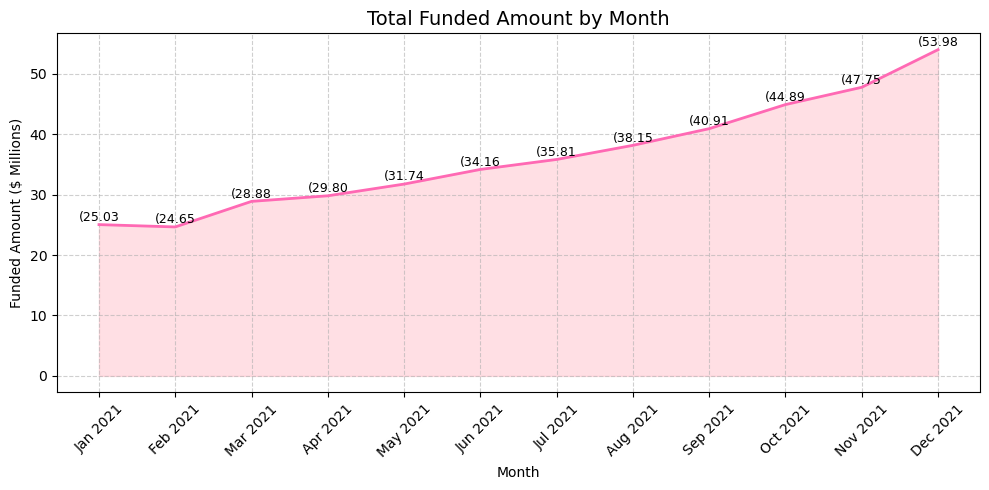

In [39]:
monthly_funded = (
    df.sort_values('issue_date')
    .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
    .groupby('month_name', sort=False)['loan_amount']
    .sum()
    .div(1_000_000)
    .reset_index(name='loan_amount_millions')
)

plt.figure(figsize=(10, 5))
plt.fill_between(
    monthly_funded['month_name'],
    monthly_funded['loan_amount_millions'],
    color='#FFC0CB',  # light pink fill
    alpha=0.5
)
plt.plot(
    monthly_funded['month_name'],
    monthly_funded['loan_amount_millions'],
    color='#FF69B4',  # hot pink line
    linewidth=2
)

for i, row in monthly_funded.iterrows():
    plt.text(
        i,
        row['loan_amount_millions'] + 0.1,
        f"({row['loan_amount_millions']:.2f}",
        ha='center',
        va='bottom',
        fontsize=9,
        rotation=0,
        color='black'
    )

plt.title('Total Funded Amount by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Funded Amount ($ Millions)')
plt.xticks(
    ticks=range(len(monthly_funded)),
    labels=monthly_funded['month_name'],
    rotation=45
)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



###  Monthly Trends by Issue Date for Total Loan Applications

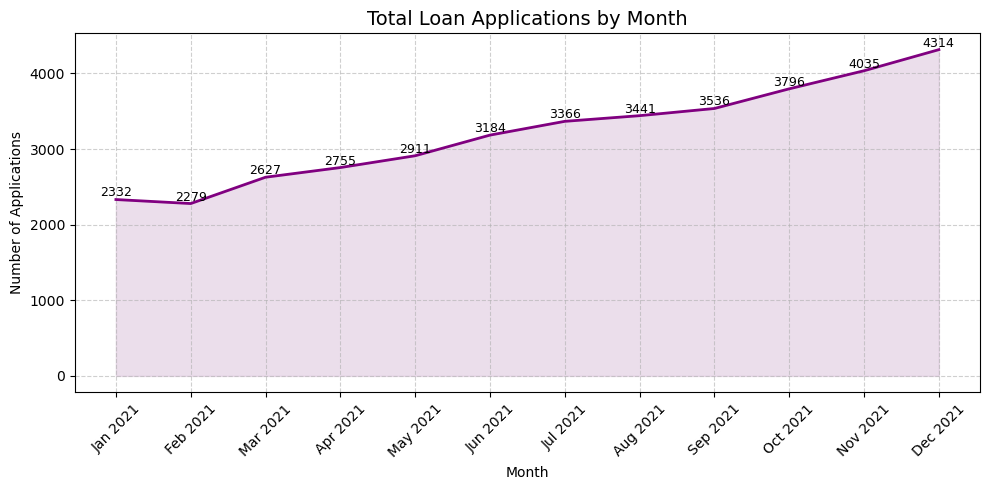

In [44]:
monthly_applications = (
    df.sort_values('issue_date')
    .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
    .groupby('month_name', sort=False)['id']
    .count()
    .reset_index(name='loan_applications_count')
)

plt.figure(figsize=(10, 5))
plt.fill_between(monthly_applications['month_name'], monthly_applications['loan_applications_count'],
                 color='thistle', alpha=0.5)
plt.plot(monthly_applications['month_name'], monthly_applications['loan_applications_count'],
         color='purple', linewidth=2)

for i, row in monthly_applications.iterrows():
    plt.text(i, row['loan_applications_count'] + 0.5, f"{row['loan_applications_count']}",
             ha='center', va='bottom', fontsize=9, rotation=0, color='black')

plt.title('Total Loan Applications by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Applications')
plt.xticks(ticks=range(len(monthly_applications)), labels=monthly_applications['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


###  Regional Analysis by State for Total Funded Amount

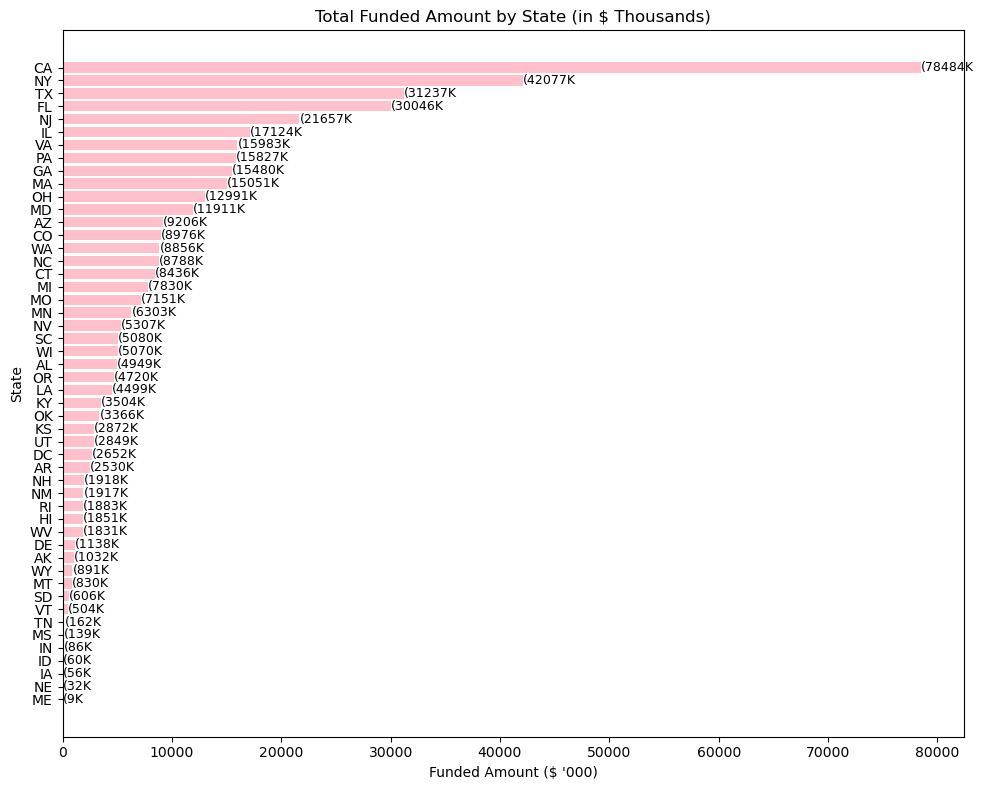

In [46]:
state_funding = df.groupby('address_state')['loan_amount'].sum().sort_values(ascending=True)
state_funding_thousands = state_funding / 1000

plt.figure(figsize=(10, 8))
bars = plt.barh(state_funding_thousands.index, state_funding_thousands.values, color='pink')

for bar in bars:
    plt.text(bar.get_width() + 10, bar.get_y() + bar.get_height() / 2,
             f"({bar.get_width():.0f}K",
             va='center', fontsize=9)

plt.title('Total Funded Amount by State (in $ Thousands)')
plt.xlabel('Funded Amount ($ \'000)')
plt.ylabel('State')
plt.tight_layout()
plt.show()



###  Loan Term Analysis by Total Funded Amount

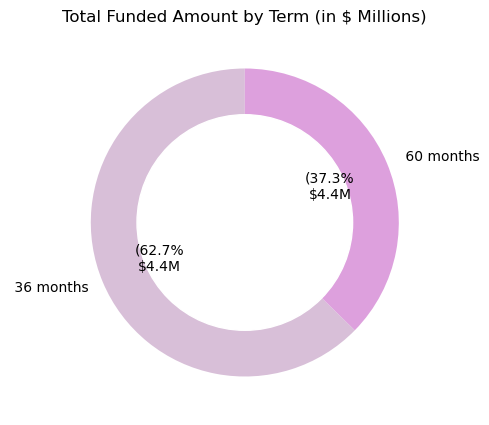

In [47]:
term_funding_millions = df.groupby('term')['loan_amount'].sum() / 1000000

plt.figure(figsize=(5, 5))
plt.pie(term_funding_millions,
        labels=term_funding_millions.index,
        autopct=lambda p: f"({p:.1f}%\n${sum(term_funding_millions)/100:.1f}M",
        startangle=90,
        wedgeprops={'width': 0.4},
        colors=['thistle', 'plum', 'darkgray', 'rosybrown']) # 使用莫兰迪色系

plt.gca().add_artist(plt.Circle((0, 0), 0.70, color='white'))
plt.title('Total Funded Amount by Term (in $ Millions)')
plt.show()


###  Employee Length by Total Funded Amount

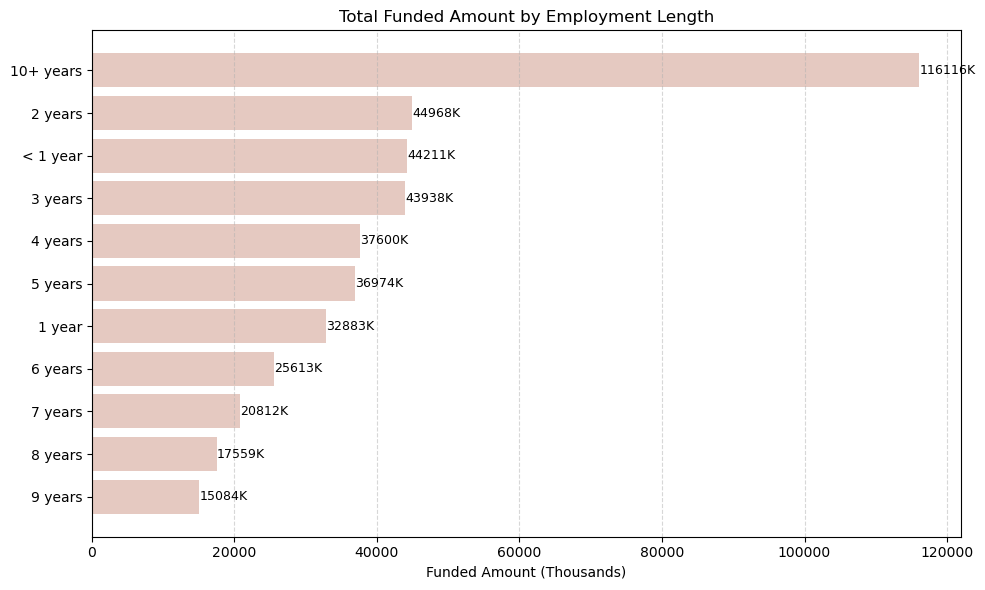

In [52]:
Emp_funding = df.groupby('emp_length')['loan_amount'].sum().sort_values()/1000

plt.figure(figsize=(10, 6))
bars = plt.barh(Emp_funding.index, Emp_funding.values, color='#E5C9C1') # Muted pink

for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height() / 2,
             f"{width:.0f}K",
             va='center', fontsize=9)

plt.xlabel('Funded Amount (Thousands)')
plt.title('Total Funded Amount by Employment Length')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



###  Loan Purpose by Total Funded Amount

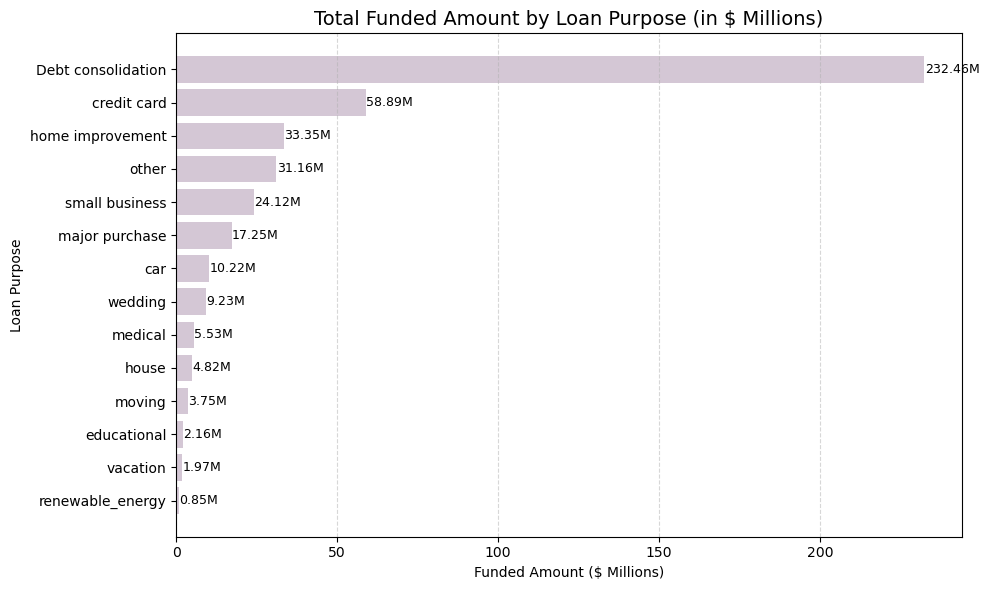

In [53]:
purpose_funding_millions = df.groupby('purpose')['loan_amount'].sum().sort_values()/1000000

plt.figure(figsize=(10, 6))
bars = plt.barh(purpose_funding_millions.index, purpose_funding_millions.values, color='#D4C7D5') # Muted lilac

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2,
             f"{width:.2f}M",
             va='center', fontsize=9)

plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.title('Total Funded Amount by Loan Purpose (in $ Millions)', fontsize=14)
plt.xlabel('Funded Amount ($ Millions)')
plt.ylabel('Loan Purpose')
plt.tight_layout()
plt.show()

###  Total Funded Amount by Home Ownership

In [64]:
Home_funding = df.groupby('home_ownership')['loan_amount'].sum().reset_index()
home_funding['loan_amount_millions'] = home_funding['loan_amount'] / 1000000

fig = px.treemap(
    home_funding,
    path=['home_ownership'],
    values='loan_amount_millions',
    color='loan_amount_millions',
    color_continuous_scale='RdPu_r',
    title='Total Funded Amount by Home Ownership (in $ Millions)'
)

fig.show()

